# 01: Data Cleaning

## 1. Basic Dataset Inspection

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [502]:
## Removing the S.No. column which is unnecessary
df.drop(columns = ['S.No.'], inplace = True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [503]:
# Standardize Column Names
'''
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)
'''

'\ndf.columns = (\n    df.columns\n      .str.strip()\n      .str.lower()\n      .str.replace(" ", "_")\n)\n'

In [504]:
# Knowing the no of rows and columns
df.shape

(7253, 13)

In [505]:
## Checking basic info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [506]:
## Checking descriptive statistics about object/category columns
df.describe(include=['object','category'])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,7253,7253,7253,7253,7253,7251,7207,7207,1006
unique,2041,11,5,2,4,450,150,386,625
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,55,949,3852,5204,5952,207,732,280,6


In [507]:
## Checking descriptive statistics about Numeric columns
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [508]:
## Checking missing values in each column
(df.isnull().mean() * 100).round(2)

Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64

In [509]:
## Duplicate Records
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

(7253, 13)
1
(7252, 13)


* Duplicates bias distributions and inflate model confidence

## 02: Deep dive into one by one column and check for any futher adjustments

#### 1. Name column

In [510]:
print('Checking for Null values in Name column:', df['Name'].isnull().sum())
print('Checking for unique no of categories in Name column:', df['Name'].nunique())
print('Checking for unique categories in Name column:', df['Name'].unique())

Checking for Null values in Name column: 0
Checking for unique no of categories in Name column: 2041
Checking for unique categories in Name column: ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']


In [511]:
## Creating a new column 'Brand_Name' by extracting the first word from the 'Name' column
df['Brand_Name'] = df['Name'].str.split().str[0]
df.loc[df['Brand_Name'] == 'Land', 'Brand_Name'] = 'Land Rover'
df['Brand_Name'].nunique()

33

In [512]:
## Creating a new column 'Model_Name' by extracting from the 'Name' column
df['Model_Name'] = df['Name'].str.split().str[1:].str.join(' ')
df['Model_Name'] = (df['Model_Name'].str.replace(r'^Rover\s+', '', case=False, regex=True))

In [513]:
## Dropping the original 'Name' column as we have extracted necessary information and rearranging the cols
df.drop(columns=['Name'], inplace=True)

df = df[['Brand_Name', 'Model_Name','Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price']]
df.head()

,Brand_Name,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [514]:
df['Brand_Name'] = df['Brand_Name'].str.strip().str.title()

#### 2. Location column

In [515]:
## Checking the value counts of Location column and seeing if any cleaning is required
df['Location'].value_counts()

Location
Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64

* Data seems good and no null values

#### 3. Year column

In [516]:
## Checking descriptive statistics of 'Year' column
df['Year'].describe()

count    7252.000000
mean     2013.365830
std         3.254405
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

* Don't have any null values and range is between 1996 to 2019

#### 3. Kilometers_Driven column

count    7.252000e+03
mean     5.869999e+04
std      8.443351e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.342900e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64


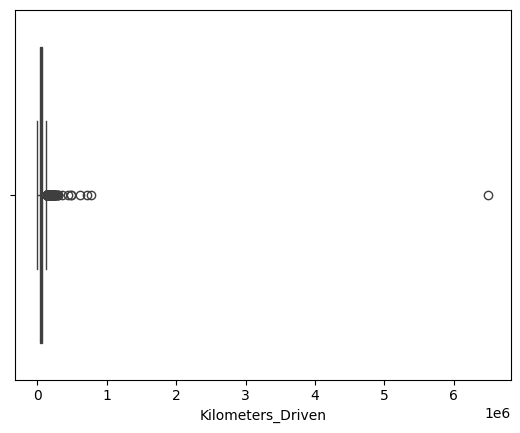

In [517]:
print(df['Kilometers_Driven'].describe())
sns.boxplot(x=df['Kilometers_Driven'])
plt.show()

Upper Cap for Kilometers_Driven: 337450.0000000353


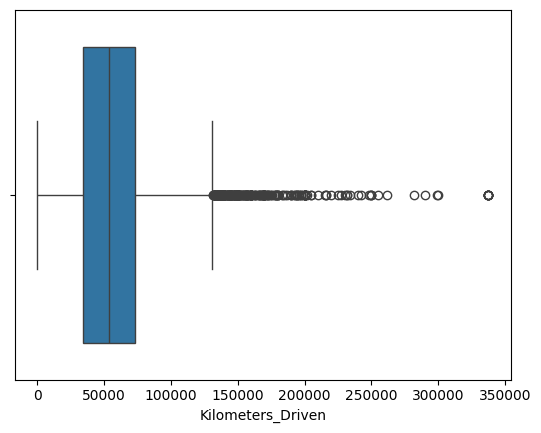

In [518]:
#Clipping the top 0.1% Extreme values using Winsorization method to prevent very large, unrealistic value
upper_cap = df['Kilometers_Driven'].quantile(0.999)
print('Upper Cap for Kilometers_Driven:', upper_cap)
df['Kilometers_Driven'] = df['Kilometers_Driven'].clip(lower=df['Kilometers_Driven'].min(), upper=upper_cap)
sns.boxplot(x=df['Kilometers_Driven'])
plt.show()

#### 4. Fuel_Type column

Checking for null values in 'Fuel_Type': 0


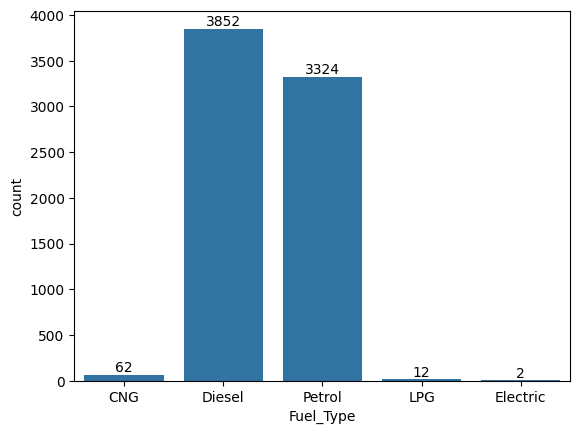

In [519]:
print("Checking for null values in 'Fuel_Type':",df['Fuel_Type'].isnull().sum())

ax = sns.countplot(x='Fuel_Type', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


#### 5. Transmission column

Checking for null values in 'Transmission': 0


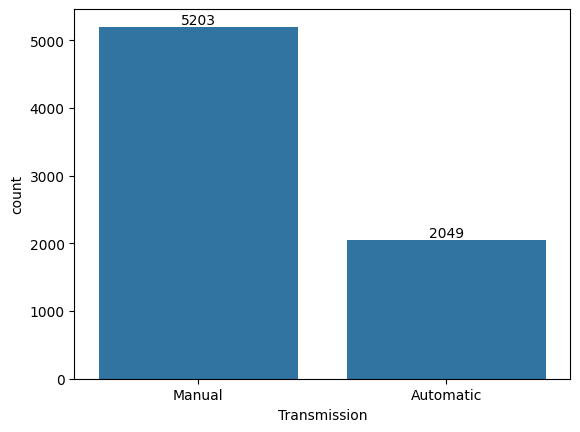

In [520]:
print("Checking for null values in 'Transmission':",df['Transmission'].isnull().sum())
##df['Transmission'].value_counts()
ax = sns.countplot(x='Transmission', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


#### 6. Owner_Type column

Checking for null values in 'Owner_Type': 0


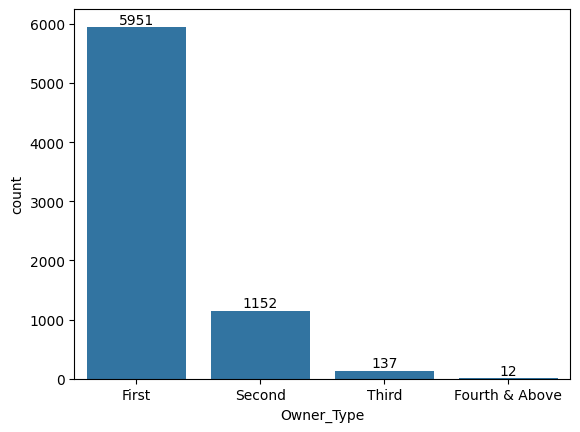

In [521]:
print("Checking for null values in 'Owner_Type':",df['Owner_Type'].isnull().sum())
ax = sns.countplot(x='Owner_Type', data=df, order=df['Owner_Type'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


#### 7. Mileage

In [522]:
## Converting Mileage column to numeric after removing the units
df['Mileage'] = pd.to_numeric(df['Mileage'].str.split().str[0], errors='coerce')
df['Mileage'].describe()

count    7250.000000
mean       18.141738
std         4.562492
min         0.000000
25%        15.170000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [523]:
## Imputation (by Fuel Type and Brand Name wise median Mileage)
df['Mileage'] = (
    df['Mileage']
      .replace(0, np.nan)
      .fillna(df.groupby(['Fuel_Type','Brand_Name'])['Mileage'].transform('median'))
)

In [524]:
## Checking 0 or null values in Mileage column, let's check them
df[(df['Mileage']==0) | df['Mileage'].isnull()]

,Brand_Name,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
915,Smart,Fortwo CDI AT,Pune,2008,103000.0,Diesel,Automatic,Second,0.0,799 CC,null bhp,2.0,NaN,3.00
1460,Land Rover,Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078.0,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,40.88
4446,Mahindra,E Verito D4,Chennai,2016,50000.0,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota,Prius 2009-2016 Z4,Mumbai,2011,44000.0,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


In [525]:
## Still we have some 0 or null values in Mileage column, let's impute them again with Fuel Type wise median Mileage
df['Mileage'] = (
    df['Mileage']
      .replace(0, np.nan)
      .fillna(df.groupby(['Fuel_Type'])['Mileage'].transform('median'))
)

df[df['Mileage'].isnull()][['Brand_Name','Model_Name', 'Fuel_Type', 'Mileage']]

,Brand_Name,Model_Name,Fuel_Type,Mileage
4446,Mahindra,E Verito D4,Electric,NaN
4904,Toyota,Prius 2009-2016 Z4,Electric,NaN


* Mileage in km/l is not applicable for electric vehicles. Therefore, missing mileage values for electric cars were retained as NaN instead of being imputed, and electric vehicles were handled separately using a fuel-type indicator.

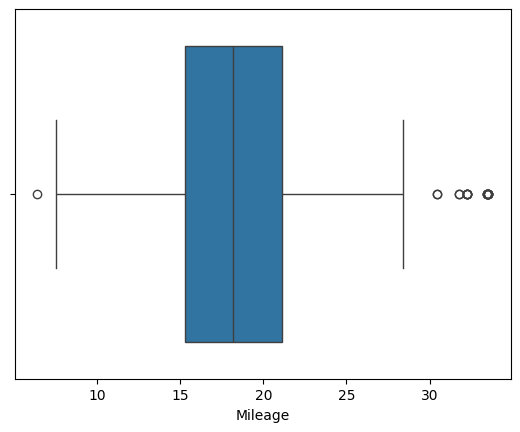

In [526]:
sns.boxplot(x=df['Mileage'])
plt.show()

In real-world car datasets:

* Mileage 6–10 km/l → large SUVs, luxury cars (valid)

* Mileage 30+ km/l → hybrids, small diesel cars (valid)

✔️ So these values are realistic, not data errors.

#### 8. Engine column

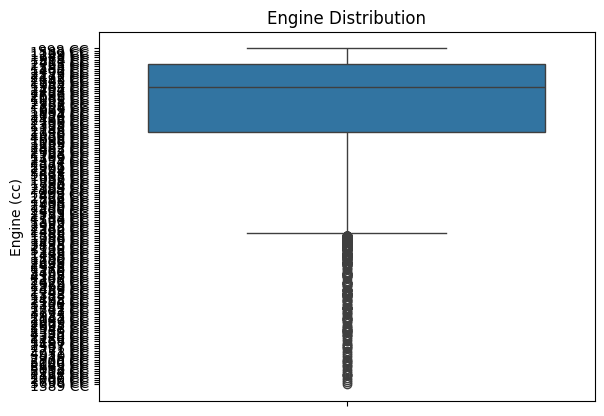

In [527]:
sns.boxplot(df['Engine'])
plt.title('Engine Distribution')
plt.ylabel('Engine (cc)')
plt.show()


In [528]:
## Converting Engine column to numeric after removing the units
df['Engine'] = pd.to_numeric(df['Engine'].str.split().str[0], errors='coerce')
df['Engine'].describe()

count    7206.000000
mean     1616.590064
std       595.324779
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

In [529]:
## Cheking null values in Engine column
df['Engine'].isnull().sum()

np.int64(46)

* we have missing values and some questionable lows.

In [530]:
## Step 1: Impute Engine column with Brand Name and Model Name wise median Engine values
df['Engine'] = (df['Engine']
                .fillna(df.groupby(['Brand_Name','Model_Name'])['Engine'].transform('median'))
                .fillna(df.groupby(['Brand_Name','Fuel_Type'])['Engine'].transform('median'))
                .fillna(df['Engine'].median())
                )

df['Engine'].isnull().sum()

np.int64(0)

In [531]:
## Step 2: Keep Electric engines as NaN
df.loc[df['Fuel_Type'] == 'Electric', 'Engine'] = np.nan
## Step 3: Replace invalid engine sizes (e.g., ≤100 cc)
df.loc[df['Engine'] <= 100, 'Engine'] = np.nan
df['Engine'].isnull().sum()

np.int64(2)

#### 9. Power column

In [532]:
df['Power'] = pd.to_numeric(df['Power'].str.split().str[0], errors='coerce')
df['Power'].describe()

count    7077.000000
mean      112.764474
std        53.497297
min        34.200000
25%        75.000000
50%        94.000000
75%       138.100000
max       616.000000
Name: Power, dtype: float64

<Axes: xlabel='Power'>

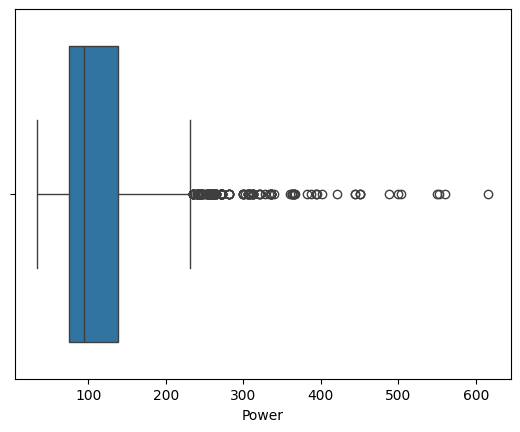

In [533]:
sns.boxplot(x=df['Power'])

Range:

* Min: 34 bhp (small cars)

* Max: 616 bhp (luxury / sports cars)

➡️ Missing percentage is low, so imputation is appropriate.

In [534]:
df['Power'].isnull().sum()

np.int64(175)

In [535]:
## Step 1: Impute Power column with Brand Name and Model Name wise median Power values
df['Power'] = (df['Power']
                .fillna(df.groupby(['Brand_Name','Model_Name'])['Power'].transform('median'))
                .fillna(df.groupby(['Brand_Name','Fuel_Type'])['Power'].transform('median'))
                )

df['Power'].isnull().sum()

np.int64(3)

In [536]:
df.dropna(subset=['Power'], inplace=True)
df['Power'].isnull().sum()

np.int64(0)

#### 10. Seats column

In [537]:
df['Seats'].value_counts()

Seats
5.0     6045
7.0      796
8.0      170
4.0      119
6.0       38
2.0       17
10.0       8
9.0        3
0.0        1
Name: count, dtype: int64

Seats:

* Represents capacity, not a continuous measurement

* Has finite, discrete values (2, 4, 5, 7, 8, etc.)

* Arithmetic operations (mean, std) have no real meaning

➡️ Conclusion:
👉 Treat Seats as a categorical (ordinal) variable, not continuous numeric.

In [538]:
## Step 1: Impute Seats column with Brand Name and Model Name wise Mode values
df['Seats'] = (df['Seats']
                .replace(0,np.nan)
                .fillna(df.groupby(['Brand_Name','Model_Name'])['Seats'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))
                .fillna(df.groupby(['Brand_Name'])['Seats'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))
                .fillna(df['Seats'].mode()[0])
                )

df.loc[df['Seats']==0, 'Seats'] = df['Seats'].mode()[0]
df['Seats'].isnull().sum()

np.int64(0)

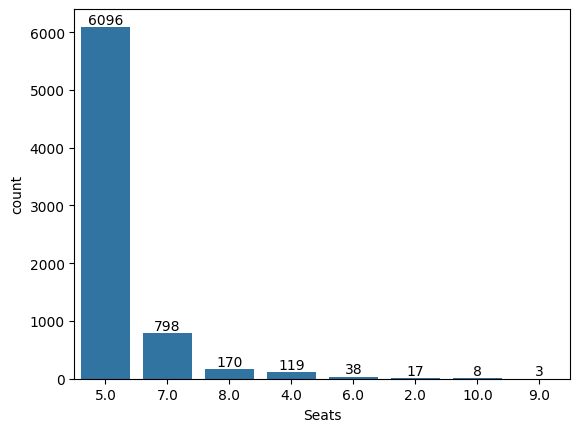

In [539]:
ax = sns.countplot(x='Seats', data=df, order=df['Seats'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


#### 11. New_Price column

In [540]:
df['New_Price'].isnull().sum()*100/df.shape[0]

np.float64(86.12222375500069)

1️⃣ Extremely high missingness

Total rows: 7,249

Non-null: 1,006

Missing: ~86%

📌 Rule of thumb:

If a column has >60–70% missing and is not the target, it is usually safe to drop.

In [541]:
df = df.drop(columns=['New_Price'])
df.head()

,Brand_Name,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [542]:

'''
price = df['New_Price'].str.lower().str.strip()
df['New_Price_Lakh'] = np.nan

# Handle crore
mask_cr = price.str.contains('cr', na=False)
df.loc[mask_cr, 'New_Price_Lakh'] = (
    price.loc[mask_cr]
         .str.replace('cr', '', regex=False)
         .astype(float) * 100
)

# Handle lakh
mask_lakh = price.str.contains('lakh', na=False)
df.loc[mask_lakh, 'New_Price_Lakh'] = (
    price.loc[mask_lakh]
         .str.replace('lakh', '', regex=False)
         .astype(float)
)

df['New_Price_Lakh'].describe() 
'''
print()

#### 12. Price column

In [543]:
print("Total records in the data:", df.shape[0])
print("No of records Missing price column:", df['Price'].isnull().sum())
print("No of records in the price column:", df.shape[0]-df['Price'].isnull().sum())
print("% of missing in price column:", round(df['Price'].isnull().sum()/df.shape[0]*100,2))


Total records in the data: 7249
No of records Missing price column: 1232
No of records in the price column: 6017
% of missing in price column: 17.0


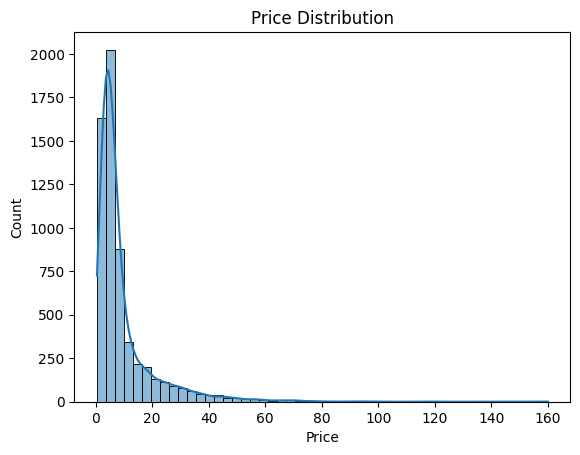

In [544]:
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

Price (used car selling price)

* Highly right-skewed

* Max value: 160 lakh (luxury cars → valid)

🚨 Key principle (VERY IMPORTANT)

You should NEVER drop the Price column
and you should NOT drop rows blindly, because Price is the target / core business variable.

✅ Correct overall strategy

1️⃣ Impute missing prices intelligently

2️⃣ Do NOT remove expensive cars

3️⃣ Treat outliers using capping or log transform

4️⃣ Keep the original price meaning intact

In [545]:
# Impute Price column with hierarchical median imputation

df['Price'] = (
    df['Price']
      .fillna(df.groupby(['Brand_Name','Model_Name','Year'])['Price'].transform('median'))
      .fillna(df.groupby(['Brand_Name','Model_Name'])['Price'].transform('median'))
      .fillna(df.groupby(['Brand_Name'])['Price'].transform('median'))
      .fillna(df['Price'].median())
)

df['Price'].isnull().sum()


np.int64(0)

## 03: Final Step and saving the cleaned data file

Convert to category only when:

* Column has limited unique values

* Represents labels, not quantities

* Will be used for EDA / ML encoding

In [546]:
cat_cols = [
    'Location',
    'Fuel_Type',
    'Transmission',
    'Owner_Type',
    'Seats'
]
df[cat_cols] = df[cat_cols].astype('category')

In [547]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Brand_Name         7249 non-null   object  
 1   Model_Name         7249 non-null   object  
 2   Location           7249 non-null   category
 3   Year               7249 non-null   int64   
 4   Kilometers_Driven  7249 non-null   float64 
 5   Fuel_Type          7249 non-null   category
 6   Transmission       7249 non-null   category
 7   Owner_Type         7249 non-null   category
 8   Mileage            7247 non-null   float64 
 9   Engine             7247 non-null   float64 
 10  Power              7249 non-null   float64 
 11  Seats              7249 non-null   category
 12  Price              7249 non-null   float64 
dtypes: category(5), float64(5), int64(1), object(2)
memory usage: 546.4+ KB
None


In [548]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,7249.000000,7249.000000,7247.000000,7247.000000,7249.000000,7249.000000
mean,2013.369706,57633.442820,18.329834,1615.598868,112.272138,9.339263
std,3.247456,35157.482851,4.146182,594.430642,53.407316,10.871450
min,1998.000000,171.000000,6.400000,624.000000,34.200000,0.440000
25%,2011.000000,34000.000000,15.300000,1198.000000,75.000000,3.500000
50%,2014.000000,53392.000000,18.200000,1493.000000,92.000000,5.500000
75%,2016.000000,73000.000000,21.100000,1968.000000,138.030000,9.850000
max,2019.000000,337450.000000,33.540000,5998.000000,616.000000,160.000000


In [549]:
df.isna().sum()

Brand_Name           0
Model_Name           0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               2
Power                0
Seats                0
Price                0
dtype: int64

In [550]:
# Check for Duplicate Records and remove them at the end
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

(7249, 13)
3
(7246, 13)


In [551]:
## Exporting the cleaned data to a new CSV file
df.to_csv("../data/used_cars_data_cleaned.csv", index=False)

## Data Cleaning Summary
* The dataset was cleaned by standardizing brand and model names, handling missing values using domain-aware imputation, and treating outliers through winsorization rather than removal to preserve valid luxury vehicles. Categorical variables were explicitly converted to category type for clarity and efficiency, while numeric features were retained in their continuous form. The final dataset contains no critical missing values and is ready for exploratory analysis and modeling.